In [1]:
import os
from pathlib import Path

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
from dpipe.io import load, choose_existing
from dpipe.torch import load_model_state

from ttt_lib.q_learning import PolicyNetworkQ, PolicyPlayer, play_game, train_q_learning
from ttt_lib.field import Field

In [42]:
Q_EXP_PATH = choose_existing(
    Path('/nmnt/x2-hdd/experiments/rl/q_3x3'),
    Path('/experiments/borish/RL/ttt/mces')
)

os.listdir(Q_EXP_PATH)

['n_step_1_v2',
 'n_step_2_v3',
 'test0',
 'n_step_1_v3',
 'n_step_2_v3_augm',
 'n_step_2_v1',
 'test1',
 'n_step_1_v1',
 'n_step_1_v3_augm',
 'n_step_2_v2']

# Visualization

In [51]:
exp_path = Q_EXP_PATH / 'n_step_2_v3_augm'

In [52]:
device = 'cpu'
n = 3
kernel_len = 3
cnn_features = (128, 64)

field = Field(n=n, kernel_len=kernel_len, device=device, check_device=device)
model = PolicyNetworkQ(n=n, structure=cnn_features)
load_model_state(model, exp_path / 'model.pth')

eps = 0
player = PolicyPlayer(model=model, field=field, eps=eps, device=device)
player.eval()

In [53]:
f_history, s_history, a_history, value, q_history, p_history = play_game(player=player, train=False, augm=False,
                                                                         return_proba=True, return_policy=True)

In [ ]:
# code to visualise (s, a) sequence

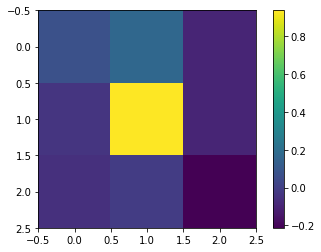

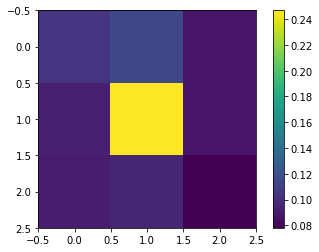

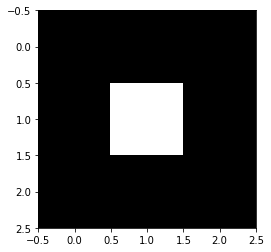

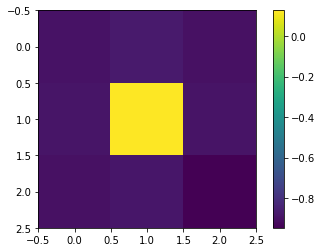

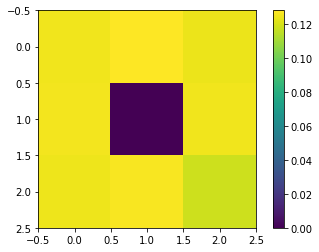

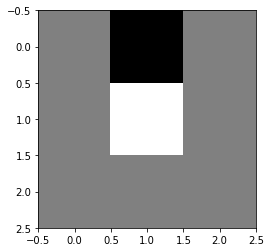

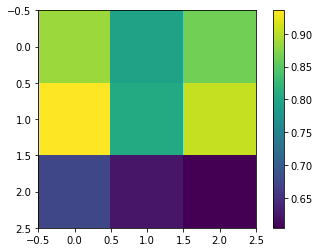

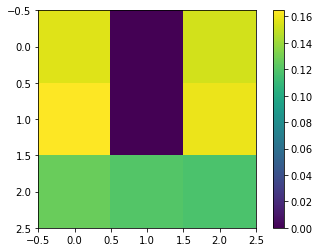

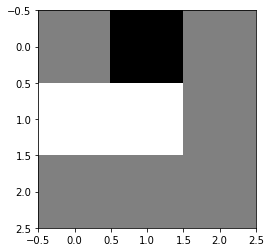

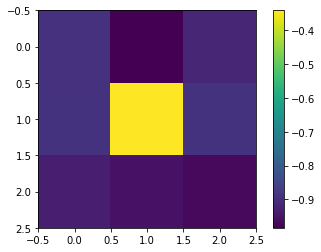

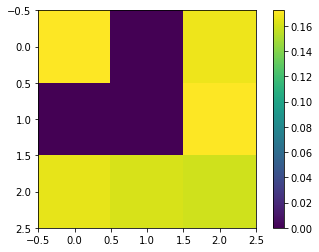

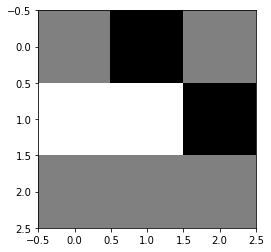

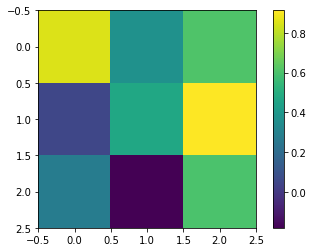

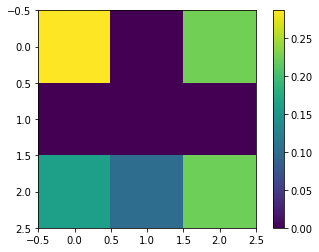

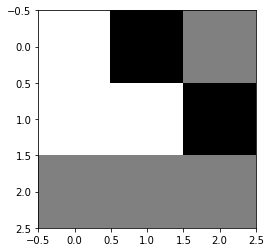

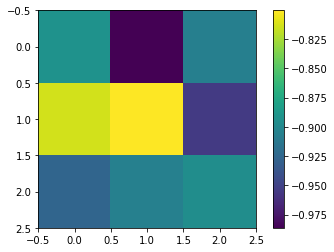

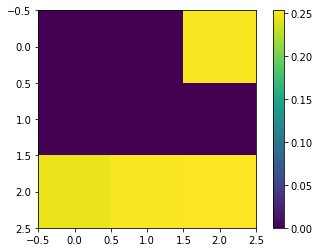

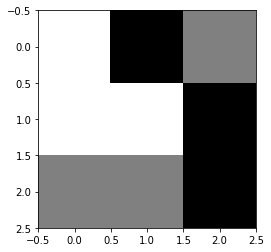

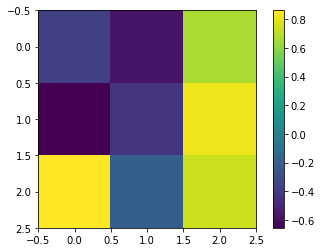

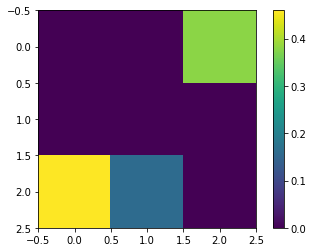

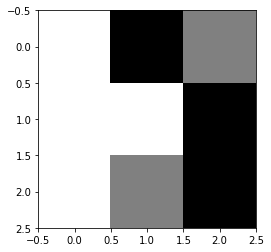

In [54]:
field_v = Field(n, kernel_len)
for s, a, q, p in zip(s_history, a_history, q_history, p_history):
    plt.imshow(q.detach().numpy())
    plt.colorbar()
    plt.show()
    
    plt.imshow(p.detach().numpy())
    plt.colorbar()
    plt.show()

    i, j = a // n, a % n
    field_v.set_state(s)
    field_v.make_move(i, j)
    field_v.show_field()

## Check some manual games

In [65]:
player.update_field(np.zeros((n, n), dtype='float32'))

None


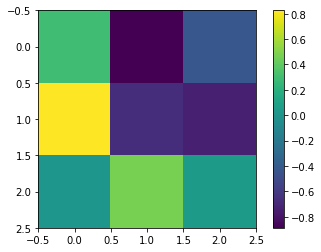

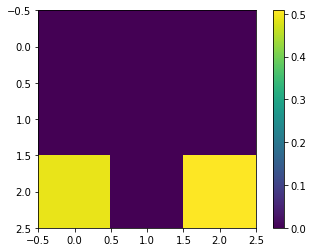

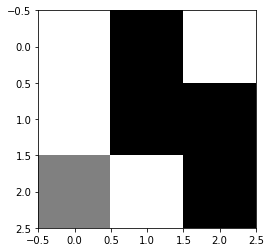

In [73]:
q, a, v, p = player.action(train=False, return_proba=True)

print(v)

plt.imshow(q.detach().cpu().numpy())
plt.colorbar()
plt.show()

plt.imshow(p.detach().cpu().numpy())
plt.colorbar()
plt.show()

player.field.show_field()

1


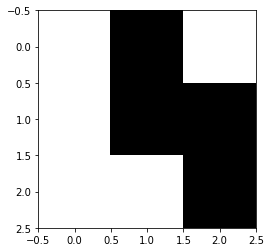

In [75]:
_, _, v = player.manual_action(2, 0)

print(v)

player.field.show_field()